# Parch & Posey Business Data Analysis

## Part 1 - General EDA: Getting to Know the Data

## 1.1. Data Collection

In [1]:
import pandas as pd
import numpy as nmp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
orders = pd.read_csv('../data/orders.csv', parse_dates = True)
orders.rename(columns = {'occurred_at':'orders_date_time','id':'order_id'}, inplace = True)
orders.head(3)

,order_id,account_id,orders_date_time,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd
0,1,1001,10/6/2015 17:31,123,22,24,169,613.77,164.78,194.88,973.43
1,2,1001,11/5/2015 3:34,190,41,57,288,948.10,307.09,462.84,1718.03
2,3,1001,12/4/2015 4:21,85,47,0,132,424.15,352.03,0.00,776.18


In [3]:
accounts = pd.read_csv('../data/accounts.csv')
accounts.rename(columns = {'id':'account_id','sales_rep_id':'sales_person_id','name':'account'}, 
                inplace = True)
accounts.head(3)

,account_id,account,website,lat,long,primary_poc,sales_person_id
0,1001,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500
1,1011,Exxon Mobil,www.exxonmobil.com,41.169156,-73.849374,Sung Shields,321510
2,1021,Apple,www.apple.com,42.290495,-76.084009,Jodee Lupo,321520


In [4]:
sr = pd.read_csv('../data/sales_representatives.csv')
sr.rename(columns = {'id':'sales_person_id','name':'sales_person'}, inplace = True)
sr.head(3)

,sales_person_id,sales_person,region_id
0,321500,Samuel Racine,1
1,321510,Eugena Esser,1
2,321520,Michel Averette,1


In [5]:
regions = pd.read_csv('../data/regions.csv')
regions.rename(columns = {'id':'region_id','name':'region'}, inplace = True)
regions.head(3)

,region_id,region
0,1,Northeast
1,2,Midwest
2,3,Southeast


## 1.2 Data preparation & Transformation

In [6]:
df = (orders.merge(accounts, 'inner', left_on = 'account_id', right_on = 'account_id').
      merge(sr, 'inner', left_on = 'sales_person_id', right_on = 'sales_person_id').
      merge(regions, 'inner', left_on = 'region_id', right_on = 'region_id')
      )
df.head()

,order_id,account_id,orders_date_time,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd,account,website,lat,long,primary_poc,sales_person_id,sales_person,region_id,region
0,1,1001,10/6/2015 17:31,123,22,24,169,613.77,164.78,194.88,973.43,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500,Samuel Racine,1,Northeast
1,2,1001,11/5/2015 3:34,190,41,57,288,948.10,307.09,462.84,1718.03,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500,Samuel Racine,1,Northeast
2,3,1001,12/4/2015 4:21,85,47,0,132,424.15,352.03,0.00,776.18,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500,Samuel Racine,1,Northeast
3,4,1001,1/2/2016 1:18,144,32,0,176,718.56,239.68,0.00,958.24,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500,Samuel Racine,1,Northeast
4,5,1001,2/1/2016 19:27,108,29,28,165,538.92,217.21,227.36,983.49,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500,Samuel Racine,1,Northeast


In [7]:
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 6911
Number of columns: 20


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6911 entries, 0 to 6910
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          6911 non-null   int64  
 1   account_id        6911 non-null   int64  
 2   orders_date_time  6911 non-null   object 
 3   standard_qty      6911 non-null   int64  
 4   gloss_qty         6911 non-null   int64  
 5   poster_qty        6911 non-null   int64  
 6   total             6911 non-null   int64  
 7   standard_amt_usd  6911 non-null   float64
 8   gloss_amt_usd     6911 non-null   float64
 9   poster_amt_usd    6911 non-null   float64
 10  total_amt_usd     6911 non-null   float64
 11  account           6911 non-null   object 
 12  website           6911 non-null   object 
 13  lat               6911 non-null   float64
 14  long              6911 non-null   float64
 15  primary_poc       6911 non-null   object 
 16  sales_person_id   6911 non-null   int64  


In [9]:
# delet any id column
cols = [col for col in df.columns if 'id' in col]
df.drop(cols, axis = 1, inplace = True)

In [10]:
df['coordinates'] = list(df[['lat', 'long']].itertuples(index=False, name=None))
df.drop(columns = ['lat', 'long'], inplace = True)
df['orders_date_time'] = pd.to_datetime(df['orders_date_time'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6911 entries, 0 to 6910
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   orders_date_time  6911 non-null   datetime64[ns]
 1   standard_qty      6911 non-null   int64         
 2   gloss_qty         6911 non-null   int64         
 3   poster_qty        6911 non-null   int64         
 4   total             6911 non-null   int64         
 5   standard_amt_usd  6911 non-null   float64       
 6   gloss_amt_usd     6911 non-null   float64       
 7   poster_amt_usd    6911 non-null   float64       
 8   total_amt_usd     6911 non-null   float64       
 9   account           6911 non-null   object        
 10  website           6911 non-null   object        
 11  primary_poc       6911 non-null   object        
 12  sales_person      6911 non-null   object        
 13  region            6911 non-null   object        
 14  coordinates       6911 n

Seems clean and ready for EDA

## 1.3. Categorical Columns EDA

In [12]:
# list the categorical columns
cate_cols = df.select_dtypes(include = 'object').columns
cate_cols

Index(['account', 'website', 'primary_poc', 'sales_person', 'region',
       'coordinates'],
      dtype='object')

### 1.3.1. Ananlysis of 'account' Column

In [13]:
df['account'].value_counts().to_frame()

,account
Leucadia National,71
Sysco,68
Supervalu,68
Arrow Electronics,67
Archer Daniels Midland,66
...,...
Assurant,1
Deere,1
CBS,1
Lennar,1


In [14]:
print('Total number of distinct accounts is', len(df['account'].value_counts()))

Total number of distinct accounts is 349


Due to the large number of website, I'll focus on the top 10

In [15]:
top10_accounts_by_count = (df['account'].
                           value_counts().
                           head(10).
                           to_frame().
                           reset_index().
                           rename(columns = {'index':'account','account':'transactions'})
                          )             
top10_accounts_by_count

,account,transactions
0,Leucadia National,71
1,Sysco,68
2,Supervalu,68
3,Arrow Electronics,67
4,Archer Daniels Midland,66
5,Mosaic,66
6,General Dynamics,66
7,Philip Morris International,65
8,United States Steel,65
9,Fluor,65


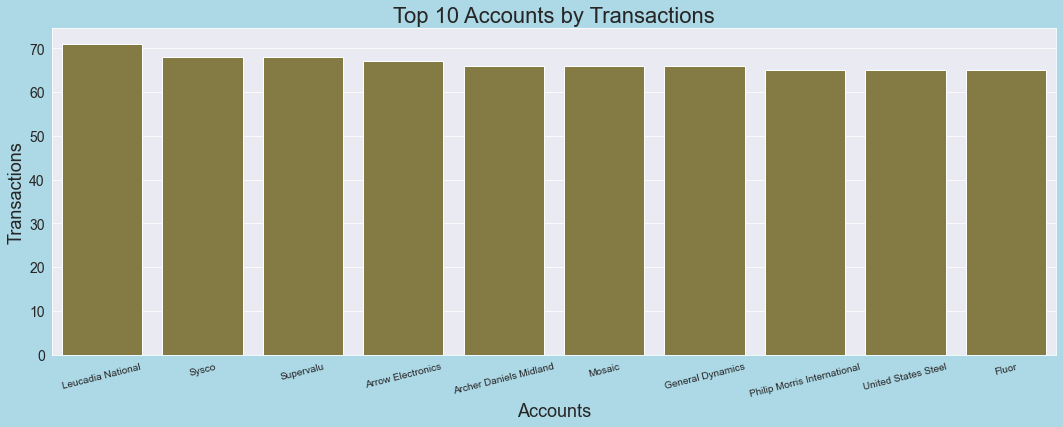

In [16]:
# plot the values in top10_accounts_by_count
plt.figure(figsize = (18,6), facecolor = 'lightblue')
sns.barplot(x = 'account', y = 'transactions', data = top10_accounts_by_count, color ='#8d8339')

plt.title('Top 10 Accounts by Transactions', size = 22)
plt.xlabel('Accounts', size = 18)
plt.xticks(rotation = 14)
plt.ylabel('Transactions', size = 18)
plt.yticks(size =14)
plt.show()

### 1.3.2. Ananlysis of 'website' Column

In [17]:
df['website'].value_counts().to_frame()

,website
www.leucadia.com,71
www.sysco.com,68
www.supervalu.com,68
www.arrow.com,67
www.adm.com,66
...,...
www.assurant.com,1
www.johndeere.com,1
www.cbscorporation.com,1
www.lennar.com,1


In [18]:
print('Total number of distinct websites is',len(df['website'].value_counts()))

Total number of distinct websites is 349


Due to the large number of website, I'll focus on the top 10

In [19]:
  top10_websites_by_count =  (df['website'].
                              value_counts().
                              head(10).
                              to_frame().
                              reset_index().rename(columns = {'index':'website','website':'transactions'})
                              )
top10_websites_by_count

,website,transactions
0,www.leucadia.com,71
1,www.sysco.com,68
2,www.supervalu.com,68
3,www.arrow.com,67
4,www.adm.com,66
5,www.mosaicco.com,66
6,www.generaldynamics.com,66
7,www.pmi.com,65
8,www.ussteel.com,65
9,www.fluor.com,65


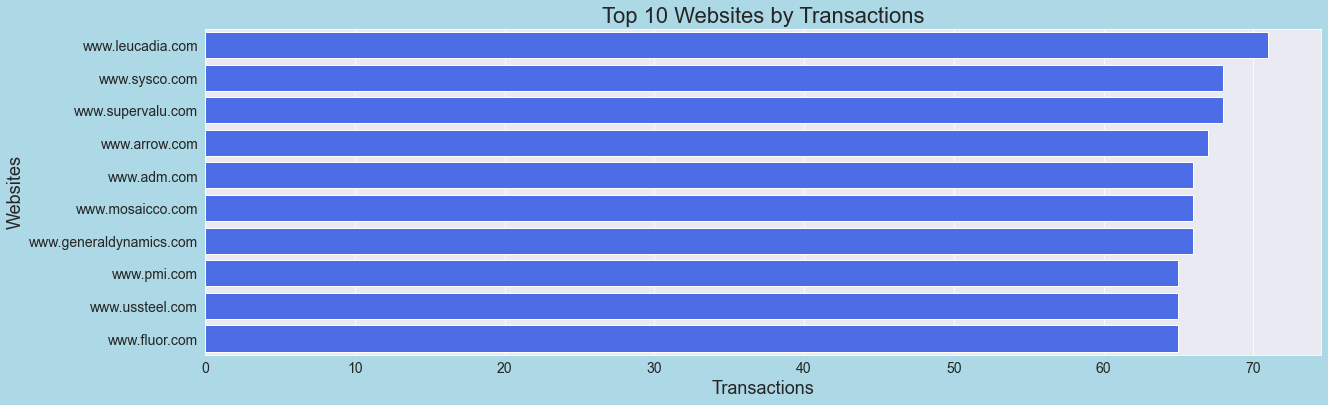

In [20]:
# plot top10_websites_by_count
plt.figure(figsize = (20,6), facecolor = 'lightblue')
sns.barplot(y= 'website', x = 'transactions', data = top10_websites_by_count, orient = 'h',color ='#335EFF' )

plt.title('Top 10 Websites by Transactions', size=22)
plt.xlabel('Transactions',size =18)
plt.xticks(size = 14)
plt.ylabel('Websites',size =18)
plt.yticks(size = 14)
plt.show()

### 1.3.3. Aanalysis of 'region Column

In [21]:
regions_count = (df['region'].value_counts().
                 to_frame().reset_index().
                 rename(columns = {'index':'region','region':'transactions'}))
regions_count

,region,transactions
0,Northeast,2356
1,Southeast,2024
2,West,1634
3,Midwest,897


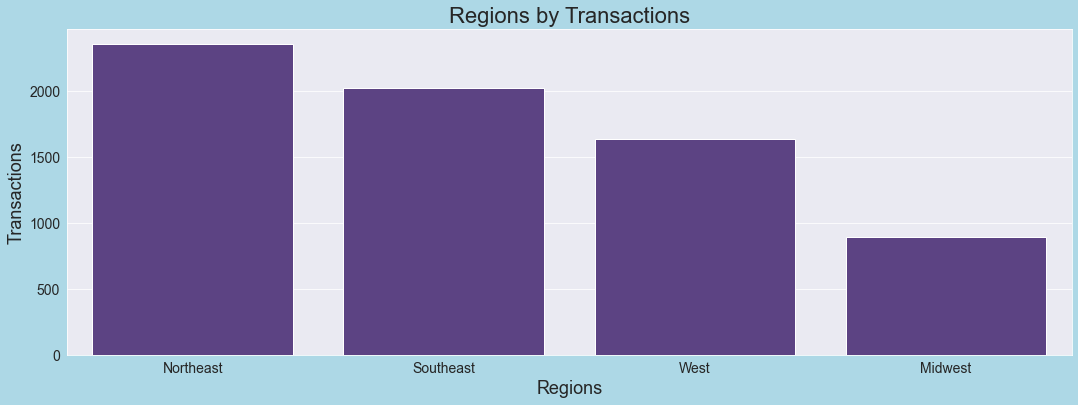

In [22]:
# plot the values in regions_count
plt.figure(figsize = (18,6), facecolor = 'lightblue')
sns.barplot(x = 'region',y= 'transactions', data = regions_count, color = '#59398d' )

plt.title('Regions by Transactions', size = 22)
plt.xlabel('Regions',size = 18)
plt.xticks(size = 14)
plt.ylabel('Transactions',size = 18)
plt.yticks(size = 14)
plt.show()


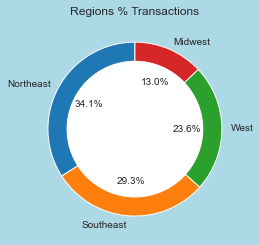

In [23]:
plt.figure(figsize = (10,4), facecolor = 'lightblue')

plt.pie(x = regions_count['transactions'],
        labels = regions_count['region'],
        startangle= 90,
        autopct= '%2.1F%%')
circle = plt.Circle((0,0), 0.78, color = 'white')
get_current_figure = plt.gcf()
get_current_figure.gca().add_artist(circle)
plt.title('Regions % Transactions')
plt.show()

####  1.3.4. Analysis of 'sales_person' Column

In [24]:
df['sales_person'].value_counts()

Earlie Schleusner        335
Vernita Plump            299
Tia Amato                267
Georgianna Chisholm      256
Moon Torian              250
Nelle Meaux              241
Maren Musto              224
Dorotha Seawell          208
Charles Bidwell          205
Maryanna Fiorentino      204
Calvin Ollison           199
Sibyl Lauria             192
Hilma Busick             191
Elwood Shutt             191
Arica Stoltzfus          186
Delilah Krum             185
Gianna Dossey            184
Micha Woodford           179
Michel Averette          173
Elna Condello            168
Brandie Riva             167
Cliff Meints             151
Necole Victory           136
Samuel Racine            134
Dawna Agnew              116
Debroah Wardle           116
Eugena Esser             116
Julia Behrman            115
Saran Ram                106
Derrick Boggess          102
Shawanda Selke           100
Cordell Rieder            99
Marquetta Laycock         90
Ernestine Pickron         89
Ayesha Monica 

In [25]:
len(df['sales_person'].value_counts())

50

Due to the large number of 'sales_person', I'll foucs on the top 10

In [26]:
sales_persons_count = df['sales_person'].\
                      value_counts().\
                      to_frame().reset_index().\
                      rename(columns = {'index':'sales_person','sales_person':'transactions'}).\
                      head(10)

sales_persons_count

,sales_person,transactions
0,Earlie Schleusner,335
1,Vernita Plump,299
2,Tia Amato,267
3,Georgianna Chisholm,256
4,Moon Torian,250
5,Nelle Meaux,241
6,Maren Musto,224
7,Dorotha Seawell,208
8,Charles Bidwell,205
9,Maryanna Fiorentino,204


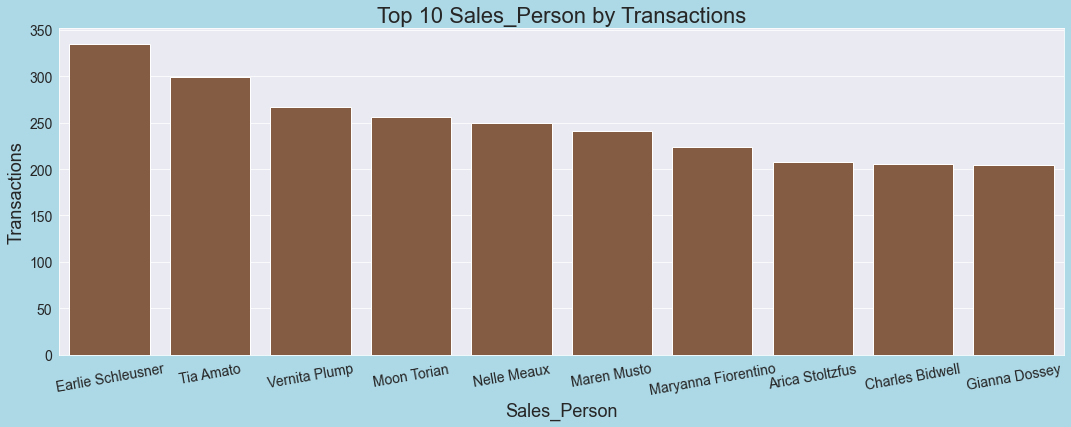

In [27]:
# plot the values in sales_persons_count
plt.figure(figsize = (18,6), facecolor = 'lightblue')
ax = sns.barplot(x = 'sales_person',y= 'transactions', data = sales_persons_count, color = '#8D5939' )
ax.set_xticklabels(labels = ['Earlie Schleusner','Tia Amato','Vernita Plump','Moon Torian',
                             'Nelle Meaux','Maren Musto','Maryanna Fiorentino','Arica Stoltzfus',
                             'Charles Bidwell','Gianna Dossey'], ha = 'center')
    
plt.title('Top 10 Sales_Person by Transactions', size = 22)
plt.xlabel('Sales_Person',size = 18)
plt.xticks(size = 14, rotation = 10)
plt.ylabel('Transactions',size = 18)
plt.yticks(size = 14)
plt.show()

#### 1.3.5. Analysis of 'primary_poc' Column

In [28]:
df['primary_poc'].value_counts()

Tamara Tuma         89
Merrill Rubino      71
Julia Laracuente    68
Kristopher Moton    68
Craig Mcalpine      67
                    ..
Aura Walz            1
Ericka Hamid         1
Sherell Yankey       1
Candi Vanleer        1
Huong Fortino        1
Name: primary_poc, Length: 328, dtype: int64

In [29]:
len(df['primary_poc'].value_counts())

328

Due to the large number of the of different values in 'primary_poc', I'll focus on the top 10

In [30]:
priamry_poc_counts=(df['primary_poc'].value_counts().
                    to_frame().reset_index().
                    rename(columns = {'index':'primary_poc','primary_poc':'transactions'}).head(10)
                   )
priamry_poc_counts

,primary_poc,transactions
0,Tamara Tuma,89
1,Merrill Rubino,71
2,Julia Laracuente,68
3,Kristopher Moton,68
4,Craig Mcalpine,67
5,Jodee Lupo,67
6,Lorette Blasi,66
7,Fay Rogowski,66
8,Erin Viverette,66
9,Chas Nagler,65


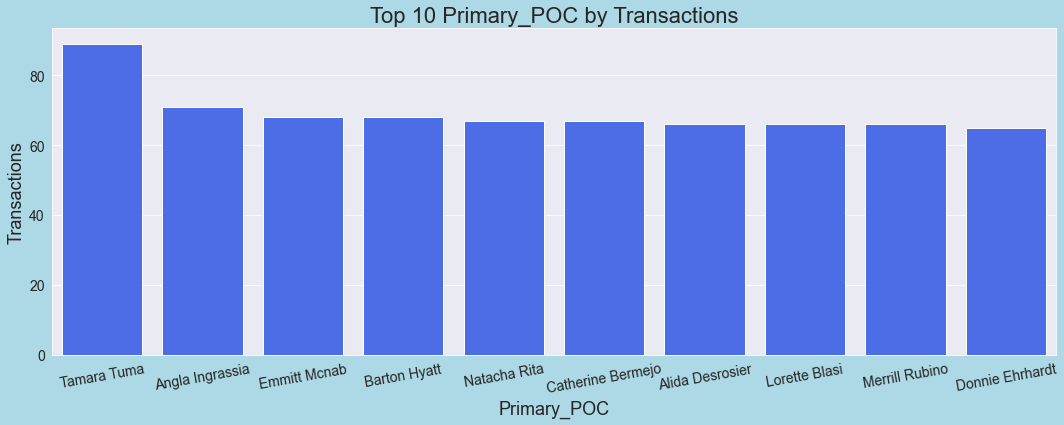

In [31]:
# plot the values in priamry_poc_counts
plt.figure(figsize = (18,6), facecolor = 'lightblue')
ax = sns.barplot(x = 'primary_poc',y= 'transactions', data = priamry_poc_counts, color = '#335EFF' )
ax.set_xticklabels(labels = ['Tamara Tuma','Angla Ingrassia','Emmitt Mcnab','Barton Hyatt',
                             'Natacha Rita','Catherine Bermejo','Alida Desrosier','Lorette Blasi',
                             'Merrill Rubino','Donnie Ehrhardt'], ha = 'center')
    
    
plt.title('Top 10 Primary_POC by Transactions', size = 22)
plt.xlabel('Primary_POC',size = 18)
plt.xticks(size = 14, rotation = 10)
plt.ylabel('Transactions',size = 18)
plt.yticks(size = 14)
plt.show()

#### 1.3.6. Analysis of 'coordinates' Column

For 'coordinates' column, it would be more beneficial if I assign the corresponding city or county to a column then analyze it. This requires a few more steps than previous. I will do the following:
- Import and initialize the geolocator, and make an empty list named 'locations'.
- Loop through each coordinate value to get the location dictionary.
- Select the 'address' key in the location dictionary and get its dictionary.
- If 'city' is among the keys of 'address', append its value to 'locations', else assign the 
values of 'county' to the 'locations'.
- Assign the values of the 'locations' list to a new column in the dataframe.


In [32]:
df['coordinates'].value_counts()

(35.52252305, -86.10327108)    71
(40.76252413, -73.97753022)    68
(33.78951934, -84.43800424)    68
(41.87858356, -87.62737294)    67
(41.92373676, -75.99411481)    66
                               ..
(34.06078878, -118.2467031)     1
(42.36409081, -71.05689009)     1
(33.74979835, -84.3674757)      1
(34.05021492, -118.2419363)     1
(36.15614254, -115.137486)      1
Name: coordinates, Length: 349, dtype: int64

Due to the large number of 'coordinates' values, I'll focus on the top 10

In [33]:
top10_locations_count = df['coordinates'].value_counts().\
                        to_frame().reset_index().\
                        rename(columns = {'index':'coordinates','coordinates':'transactions'}).head(10)
top10_locations_count

,coordinates,transactions
0,"(35.52252305, -86.10327108)",71
1,"(40.76252413, -73.97753022)",68
2,"(33.78951934, -84.43800424)",68
3,"(41.87858356, -87.62737294)",67
4,"(41.92373676, -75.99411481)",66
5,"(38.6431842, -121.9092885)",66
6,"(42.35930205, -71.05137356)",66
7,"(42.35788906, -71.06260265)",65
8,"(36.64788461, -85.75108445)",65
9,"(33.70114178, -84.38702725)",65


How to get the lcoation for each coordinate

In [34]:
# This is a short code to show the dictionaries storing the location info

from pprint import pprint
# import geopy.geocoders
from geopy.geocoders import Nominatim
# initialize the geopy.geocoders
geolocator = Nominatim(user_agent="locations_count")

for val in top10_locations_count['coordinates'].values:
    loc = geolocator.reverse(str(val[0])+","+str(val[1]))
    pprint(loc.raw)

{'address': {'country': 'United States',
             'country_code': 'us',
             'county': 'Coffee County',
             'hamlet': 'Strauss Mill',
             'postcode': '37355',
             'road': 'Fredonia Road',
             'state': 'Tennessee'},
 'boundingbox': ['35.5090916', '35.6227602', '-86.1474689', '-86.1046108'],
 'display_name': 'Fredonia Road, Strauss Mill, Coffee County, Tennessee, '
                 '37355, United States',
 'lat': '35.5222163',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '-86.1054885',
 'osm_id': 40877823,
 'osm_type': 'way',
 'place_id': 113803695}
{'address': {'building': 'MGM Building',
             'city': 'New York',
             'country': 'United States',
             'country_code': 'us',
             'county': 'New York County',
             'neighbourhood': 'Manhattan Community Board 5',
             'postcode': '10019',
             'quarter': 'Midtown',
            

Now I get the location for each coordinate. I'll write more comments in this section to explain the details of the code

In [35]:
# make an empty list of locations
locations = []
# loop through each values in the 'oordinates'
for val in top10_locations_count['coordinates'].values:
    # get the location info for each coordinate which is a dictionary
    loc = geolocator.reverse(str(val[0])+","+str(val[1]))
    # use the .raw method to get the dictionary assigned to the 'address' key in the loc ditionary
    # use the .keys() method to get the keys of the 'address' dictionary
    # check if 'city' among the keys of the 'address' dictionary
    if 'city' in  loc.raw['address'].keys():
        # append the value of the key 'city' to 'locations' list
        city = loc.raw['address']['city']
        locations.append(city)
        # if 'city' is not among the keys of the 'address' dictionary, check for 'county'
    elif 'county' in  loc.raw['address'].keys():
        # assign the valu of th 'county' key to variable named county
        county = loc.raw['address']['county']
        # append the county value to the locations
        locations.append(county)
    else:
        locations.append('NA')

# assign the values of locations list ot the new column 'locations' in the dataframe
top10_locations_count['locations'] = locations

top10_locations_count

,coordinates,transactions,locations
0,"(35.52252305, -86.10327108)",71,Coffee County
1,"(40.76252413, -73.97753022)",68,New York
2,"(33.78951934, -84.43800424)",68,Atlanta
3,"(41.87858356, -87.62737294)",67,Chicago
4,"(41.92373676, -75.99411481)",66,Susquehanna County
5,"(38.6431842, -121.9092885)",66,Yolo County
6,"(42.35930205, -71.05137356)",66,Boston
7,"(42.35788906, -71.06260265)",65,Boston
8,"(36.64788461, -85.75108445)",65,Monroe County
9,"(33.70114178, -84.38702725)",65,Atlanta


Zoom in to see the values of Atlanta in the top10_locations_map

In [36]:
import folium # import folium
import geocoder
import geopy

# make a basic map
top10_locations_map = folium.Map(location = (42.0988316272597 ,-98.82989549371113),zoom_start=4)
# loop through th rows of top10_locations_count
for index,row in top10_locations_count.iterrows():
    # add a merker for each corrdinate with popup and tooltip
    folium.Marker(location = [str(row['coordinates'][0]),str(row['coordinates'][1])],
                  popup = row['locations'],
                  tooltip = row['locations']+' '+'Transactions: '+ str(row['transactions'])).add_to(top10_locations_map)

print('Top 10 Locations by Transactions (Zoom in to see the 2 values of Atlanta)')
top10_locations_map

Top 10 Locations by Transactions (Zoom in to see the 2 values of Atlanta)


Inference: Most of the top 10 orders are from the East Region of the USA

## 1.4. Numric Columns EDA

In [37]:

rev_cols = ['total_amt_usd','standard_amt_usd','gloss_amt_usd','poster_amt_usd']
qty_cols = ['total','standard_qty','gloss_qty','poster_qty']

### 1.4.1. Revenue Columns EDA

<AxesSubplot:xlabel='total_amt_usd', ylabel='Count'>

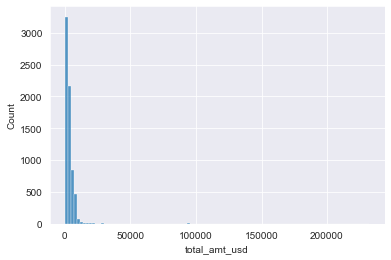

In [46]:
sns.histplot(x= df['total_amt_usd'], bins = 100)

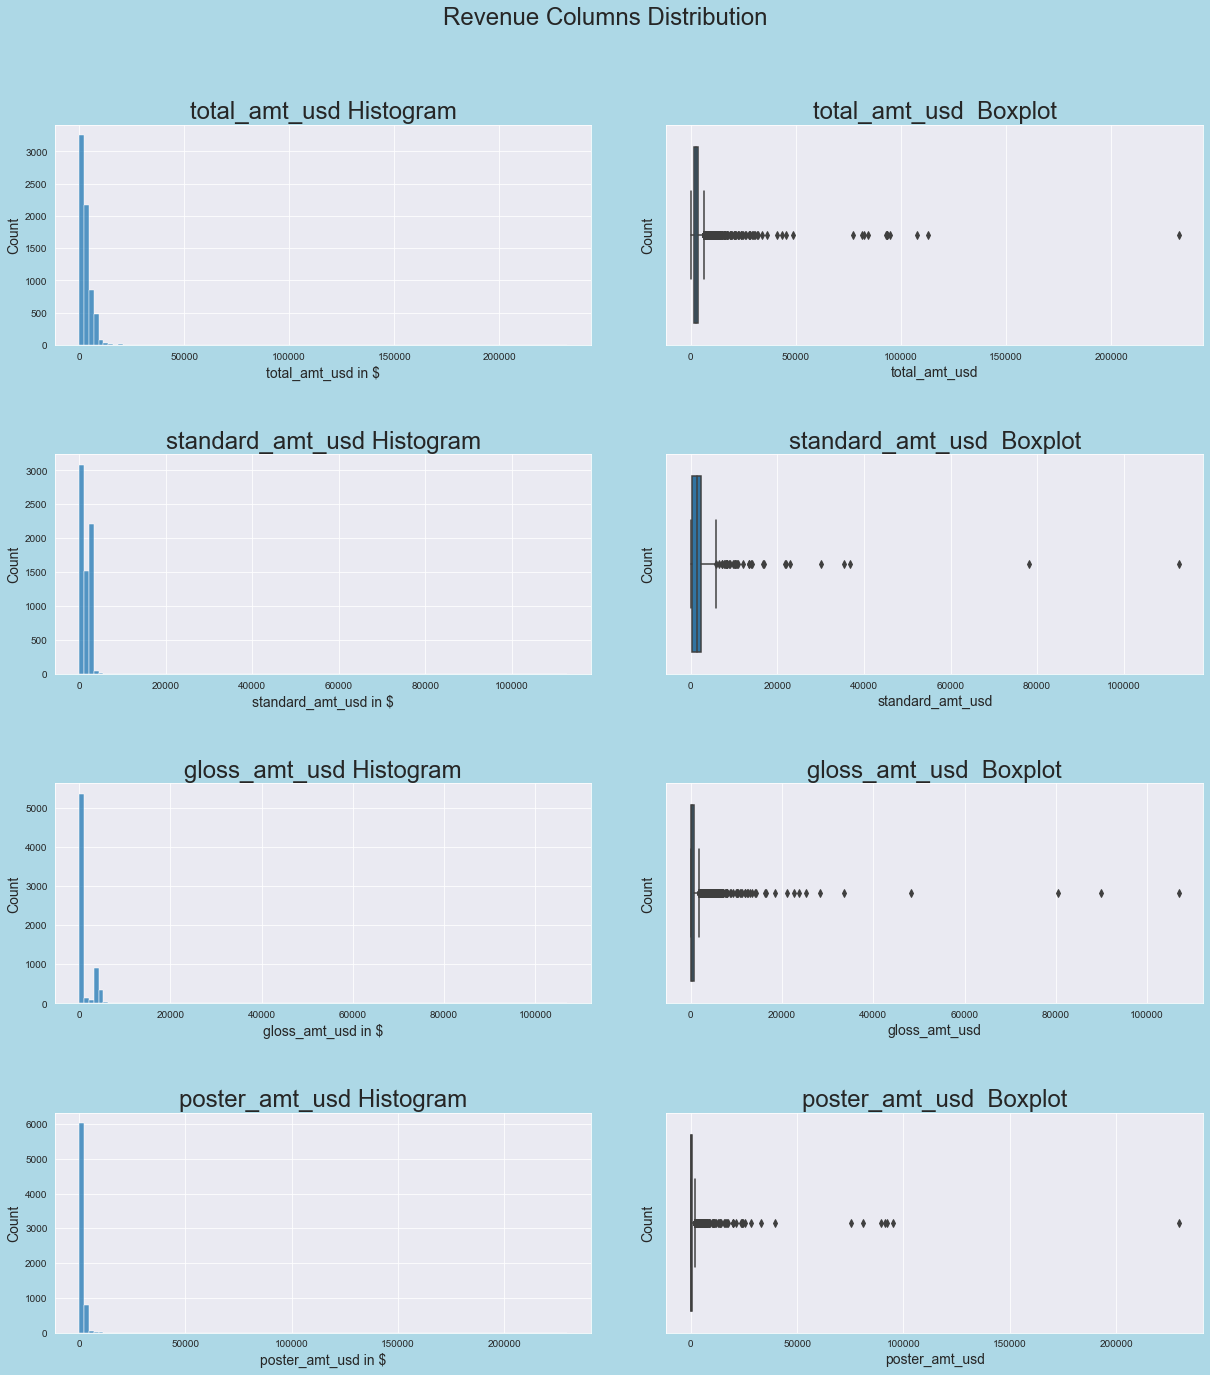

In [38]:
plt.figure(figsize = (18,20), facecolor = 'lightblue')
for i,col in enumerate(rev_cols):
    plt.suptitle('Revenue Columns Distribution', fontsize = 24)
    plt.subplot(4,2,i*2+1)
    #plt.hist(df[col],bins = 100,color = '#335EFF',alpha = 0.75, edgecolor = 'black', linewidth=2)
    sns.histplot(x= df[col], bins = 100)
    plt.title(f'{col} Histogram', fontsize = 24)
    plt.xlabel(f'{col} in $', fontsize = 14)
    plt.ylabel(f'Count', fontsize = 14)
    plt.tight_layout(pad=5.0)
    
    plt.subplot(4,2,i*2+2)
    sns.boxplot(x = df[col])
    plt.title(f'{col}  Boxplot', fontsize = 24)
    plt.xlabel(f'{col}', fontsize = 14)
    plt.ylabel(f'Count', fontsize = 14)
    plt.tight_layout(pad=5.0)

Inference:\
There are few large orders that caused the revenue data (and hence the quantity data) to be skewed to the right.For now, I just want to take a glance at the data without the outliers. I'll use the revenue to filter the data and I'll change the bin size to 30. Since the lower_limit is going to be negative, I'll use only the upper_limit for filtering.

In [39]:
q1 = df['total_amt_usd'].quantile(q = 0.25)
q3 = df['total_amt_usd'].quantile(q = 0.75)
iqr = q3-q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

In [40]:
lower_limit

-1505.4875

In [41]:
# assign the filtered data to a new dataframe
df_without_outliers = df[df['total_amt_usd'] <= upper_limit]

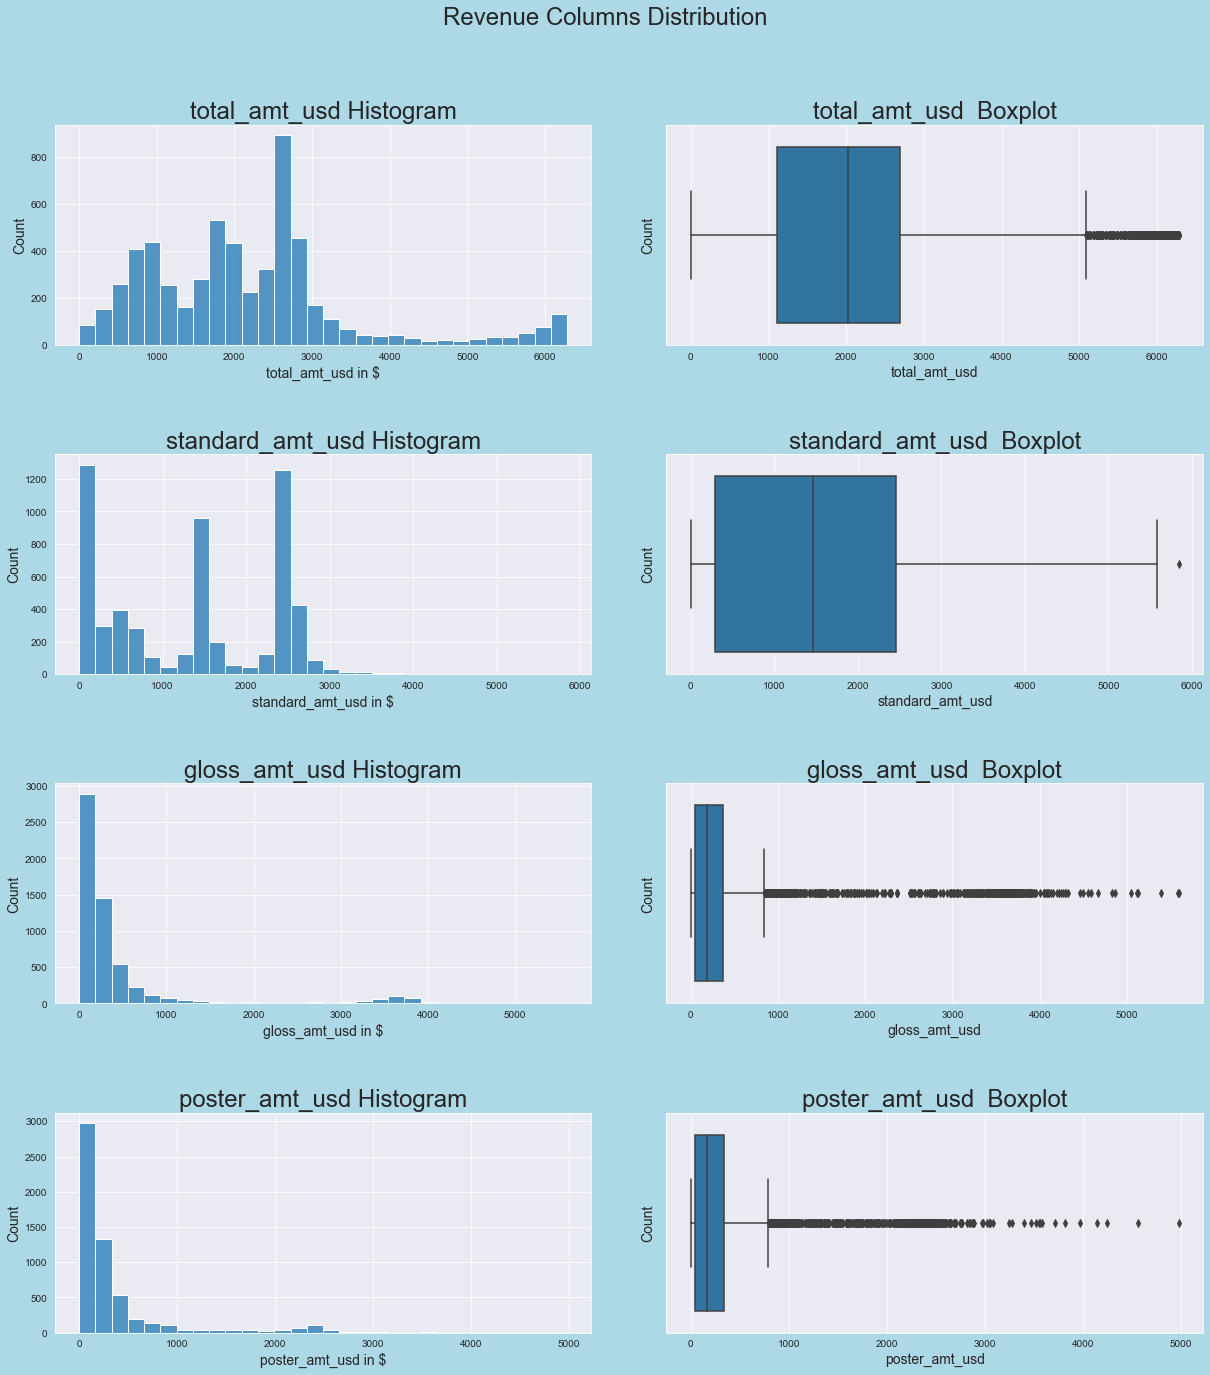

In [42]:
plt.figure(figsize = (18,20), facecolor = 'lightblue')
for i,col in enumerate(rev_cols):
    plt.suptitle('Revenue Columns Distribution', fontsize = 24)
    plt.subplot(4,2,i*2+1)
    #plt.hist(df[col],bins = 100,color = '#335EFF',alpha = 0.75, edgecolor = 'black', linewidth=2)
    sns.histplot(x= df_without_outliers[col], bins = 30)
    plt.title(f'{col} Histogram', fontsize = 24)
    plt.xlabel(f'{col} in $', fontsize = 14)
    plt.ylabel(f'Count', fontsize = 14)
    plt.tight_layout(pad=5.0)
    
    plt.subplot(4,2,i*2+2)
    sns.boxplot(x = df_without_outliers[col])
    plt.title(f'{col}  Boxplot', fontsize = 24)
    plt.xlabel(f'{col}', fontsize = 14)
    plt.ylabel(f'Count', fontsize = 14)
    plt.tight_layout(pad=5.0)

Inference:
- There are still outliers in the revnue columns even after removing the outliers in the original data.
- The histogram of the satndard_amt_usd resembles that of the total_amt_usd which suggests highest correlation among 'standard_amt_usd', 'poster_amt_usd' and 'gloss_amt_usd'. 

### 1.4.2. Quantity Columns EDA

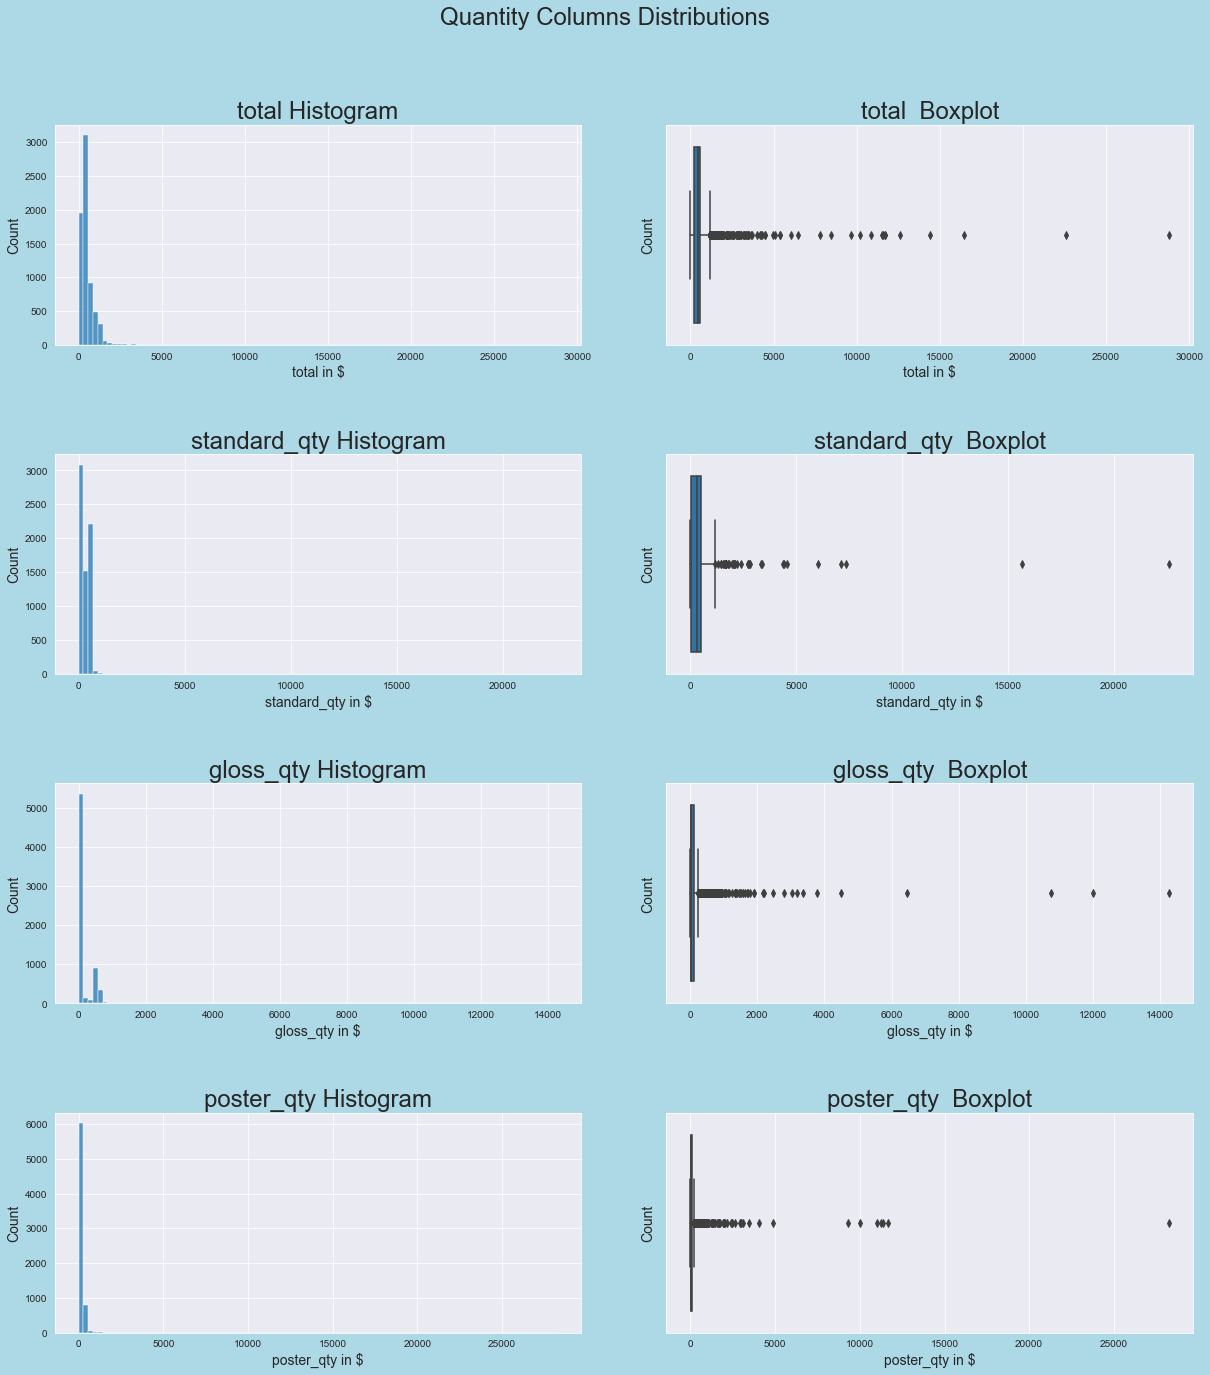

In [43]:
plt.figure(figsize = (18,20), facecolor = 'lightblue')
for i,col in enumerate(qty_cols):
    plt.suptitle('Quantity Columns Distributions', fontsize = 24)
    plt.subplot(4,2,i*2+1)
    #plt.hist(df[col],bins = 100,color = '#335EFF',alpha = 0.75, edgecolor = 'black', linewidth=2)
    sns.histplot(x= df[col], bins = 100)
    plt.title(f'{col} Histogram', fontsize = 24)
    plt.xlabel(f'{col} in $', fontsize = 14)
    plt.ylabel(f'Count', fontsize = 14)
    plt.tight_layout(pad=5.0)
    
    plt.subplot(4,2,i*2+2)
    sns.boxplot(x = df[col])
    plt.title(f'{col}  Boxplot', fontsize = 24)
    plt.xlabel(f'{col} in $', fontsize = 14)
    plt.ylabel(f'Count', fontsize = 14)
    plt.tight_layout(pad=5.0)

The same pattern seen in the revenue columns can be seen here also. This is interesting to examine in the next part of the project __Part 2: Statistical Analysis__

For mroe detailed EDA, check the next section about Data Profiling

### 1.4.3. Data profiling

In [48]:
from pandas_profiling import ProfileReport

In [49]:
data_profile = ProfileReport(df)

In [ ]:
data_profile

In [ ]:
data_profile.to_file('../data/Parch&Posey_Data_Profile.html')

In [ ]:
# plt.figure(figsize = (18,6), facecolor = 'lightblue')
# sns.barplot(x = 'region', y= 'total_amt_usd', data = df, estimator= sum )
# plt.show()

In [ ]:
# regions_count = (df.groupby('region').
#                  agg({'orders_date_time':'count'}).
#                  reset_index().
#                  rename(columns = {'orders_date_time':'transactions'})
#                 )
# regions_count

In [ ]:
# plt.figure(figsize = (18,6), facecolor = 'lightblue')
# ax = sns.barplot(x = 'region',y= 'transactions', data = regions_count )
# plt.title('Transactions by Regions', size = 14)
# plt.xlabel('region',size = 14)
# plt.xticks(size = 14)
# plt.ylabel('transactions',size = 14)
# plt.yticks(size = 14)
# plt.show()

In [ ]:
# regions_revenue = (df.groupby('region').
#                  agg({'total_amt_usd':'sum'}).
#                  reset_index().
#                  rename(columns = {'total_amt_usd':'revenue'})
#                 )
# regions_revenue

In [ ]:
# plt.figure(figsize = (18,6), facecolor = 'lightblue')
# ax = sns.barplot(x = 'region',y= 'revenue', data = regions_revenue )
# plt.title('Revenue by Regions', size = 14)
# plt.xlabel('region',size = 14)
# plt.xticks(size = 14)
# plt.ylabel('revenue',size = 14)
# plt.yticks(size = 14)
# plt.show()

In [ ]:
vals = []
for val in df[df['primary_poc']== 'Tuan Trainer']['account'].values:
    if val in vals:
        continue
    else:
        vals.append(val)
    if len(vals) >=2:
        for val in vals:
            print(val)